In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn  as sns

In [2]:
data = pd.read_csv("data.csv")

In [3]:
data.shape

(50000, 6)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB


In [5]:
data.isna().sum()

SquareFeet      0
Bedrooms        0
Bathrooms       0
Neighborhood    0
YearBuilt       0
Price           0
dtype: int64

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SquareFeet,50000.0,2006.374680,575.513241,1000.000000,1513.000000,2007.000000,2506.000000,2999.000000
Bedrooms,50000.0,3.498700,1.116326,2.000000,3.000000,3.000000,4.000000,5.000000
Bathrooms,50000.0,1.995420,0.815851,1.000000,1.000000,2.000000,3.000000,3.000000
YearBuilt,50000.0,1985.404420,20.719377,1950.000000,1967.000000,1985.000000,2003.000000,2021.000000
Price,50000.0,224827.325151,76141.842966,-36588.165397,169955.860225,225052.141166,279373.630052,492195.259972


In [7]:
data.head(10)

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065
5,2095,2,3,Suburb,2020,198208.803907
6,2724,2,1,Suburb,1993,343429.319110
7,2044,4,3,Rural,1957,184992.321268
8,2638,4,3,Urban,1959,377998.588152
9,1121,5,2,Urban,2004,95961.926014


<Axes: xlabel='Price', ylabel='Count'>

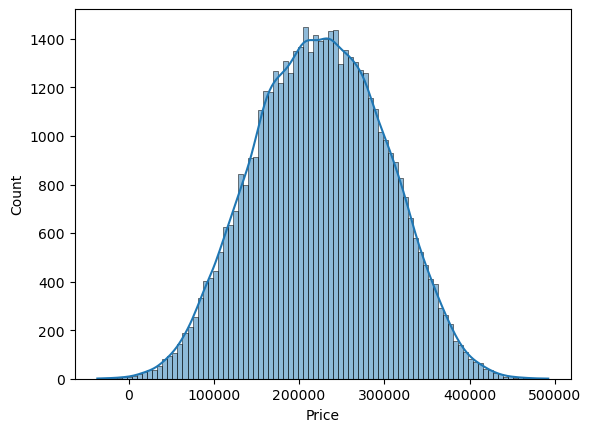

In [8]:
sns.histplot(data=data , x = 'Price', kde=True)

In [9]:
df_num = data.select_dtypes(include = ["float64", "int64"])

In [10]:
for i in df_num:
    
    # IQR
    Q1 = np.percentile(data.loc[:, i],25)
    Q3 = np.percentile(data.loc[:, i],75)
    
    IQR = Q3 - Q1
    
    print("Old shape: ",data.loc[:, i].shape)
    
    # upper bound
    upper = np.where(data.loc[:, i] >= (Q3 +2.5*IQR))
    
    # lower bound
    lower = np.where(data.loc[:, i] <= (Q1 - 2.5*IQR))
    
    print("{} -- {}".format(upper, lower))
    
    try:
        data.drop(upper[0], inplace = True)
    except: print("KeyError: {} not found in axis".format(upper[0]))
    
    try:
        data.drop(lower[0], inplace = True)
    except:  print("KeyError: {} not found in axis".format(lower[0]))
        
    print("New shape: ", data.shape)

Old shape:  (50000,)
(array([], dtype=int64),) -- (array([], dtype=int64),)
New shape:  (50000, 6)
Old shape:  (50000,)
(array([], dtype=int64),) -- (array([], dtype=int64),)
New shape:  (50000, 6)
Old shape:  (50000,)
(array([], dtype=int64),) -- (array([], dtype=int64),)
New shape:  (50000, 6)
Old shape:  (50000,)
(array([], dtype=int64),) -- (array([], dtype=int64),)
New shape:  (50000, 6)
Old shape:  (50000,)
(array([], dtype=int64),) -- (array([], dtype=int64),)
New shape:  (50000, 6)


In [11]:
from sklearn import preprocessing 
preprocessing.scale(df_num)

array([[ 0.20786058,  0.44906695, -1.22011292, -0.79175085, -0.1244012 ],
       [ 0.78648033, -0.44673786,  0.00561383, -0.26084154, -0.39155083],
       [-0.25434018, -1.34254267, -1.22011292, -0.74348636,  1.07778462],
       ...,
       [ 1.6900307 ,  1.34487176,  1.23134057, -1.12960223,  2.09194862],
       [ 1.0245311 ,  1.34487176,  0.00561383, -0.0677836 ,  2.04469595],
       [-0.75476808,  1.34487176,  1.23134057,  1.23535743, -0.04214206]])

In [12]:
scaler = preprocessing.MinMaxScaler(feature_range = (100,200))
scaler.fit_transform(df_num)

array([[156.32816408, 166.66666667, 100.        , 126.76056338,
        147.64586727],
       [172.98649325, 133.33333333, 150.        , 142.25352113,
        143.79910109],
       [143.02151076, 100.        , 100.        , 128.16901408,
        164.95649466],
       ...,
       [198.99949975, 200.        , 200.        , 116.90140845,
        179.55974049],
       [179.83991996, 200.        , 150.        , 147.88732394,
        178.87933535],
       [128.61430715, 200.        , 200.        , 185.91549296,
        148.83034078]])

In [13]:
dummies =pd.get_dummies(data["Neighborhood"])
dummies

,Rural,Suburb,Urban
0,1,0,0
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0
...,...,...,...
49995,1,0,0
49996,0,1,0
49997,0,1,0
49998,1,0,0


In [14]:
new_data = pd.concat([data,dummies],axis ='columns')
new_data.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price,Rural,Suburb,Urban
0,2126,4,1,Rural,1969,215355.283618,1,0,0
1,2459,3,2,Rural,1980,195014.221626,1,0,0
2,1860,2,1,Suburb,1970,306891.012076,0,1,0
3,2294,2,1,Urban,1996,206786.787153,0,0,1
4,2130,5,2,Suburb,2001,272436.239065,0,1,0


In [15]:
x = new_data.drop(columns = 'Neighborhood')
y = new_data['Price']

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=1)

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [18]:
knn.score(x_train,y_train)

0.9999983869128382

In [19]:
knn.score(x_test,y_test)

0.9999986020162174

In [20]:
regression =LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [21]:
predictions = regression.predict(x_test)

In [22]:
r2 = r2_score(y_test, predictions)
print(f'Linear Regression R^2 score: {r2}')

Linear Regression R^2 score: 1.0


In [23]:
import pickle

In [24]:
with open('RegressionModel.pkl', 'wb') as file:
    pickle.dump(regression, file)